In [212]:
import re
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import altair as alt
import plotly.express as px
import xlrd
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
import datetime
np.random.seed(42)

In [213]:
plt.style.use("ggplot")

In [214]:
from google.colab import drive
drive.mount('/content/drive')

file_path = "/content/drive/My Drive/online_retail_data.xlsx"

df = pd.read_excel(file_path, sheet_name = ["Year 2009-2010", "Year 2010-2011"])

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [215]:
df1 = df["Year 2009-2010"]
df2 = df["Year 2010-2011"]

In [216]:
df1.shape, df2.shape

((525461, 8), (541910, 8))

In [217]:
sum([df1.shape[0], df2.shape[0]])

1067371

In [218]:
data = pd.concat([df1, df2])

In [219]:
data.head(5)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [220]:
data.shape

(1067371, 8)

In [221]:
# Convert 'Quantity' to numeric, coercing any errors to NaN
data['Quantity'] = pd.to_numeric(data['Quantity'], errors='coerce')

# Fill NaN values (which were non-numeric) with 0. You could also choose to drop these rows
data['Quantity'].fillna(0, inplace=True)

# Convert the cleaned numeric column to integer type
data['Quantity'] = data['Quantity'].astype(int)
# Convert 'Quantity' to numeric, coercing any errors to NaN
data['Price'] = pd.to_numeric(data['Price'], errors='coerce')

# Fill NaN values (which were non-numeric) with 0. You could also choose to drop these rows
data.dropna(subset=['Price'], inplace=True)
data['Price'] = data['Price'].astype('float64')


In [222]:
data.isnull().sum()/data.shape[0]*100

,0
Invoice,0.000000
StockCode,0.000000
Description,0.410541
Quantity,0.000000
InvoiceDate,0.000000
Price,0.000000
Customer ID,22.766873
Country,0.000000


In [223]:
# first drop the rows where the description is null
data.dropna(axis = 0, subset = ["Description"], inplace = True)

In [224]:
data.isnull().sum() #Now let's check the data before droping these customer ID's

,0
Invoice,0
StockCode,0
Description,0
Quantity,0
InvoiceDate,0
Price,0
Customer ID,238625
Country,0


In [225]:
data[data["Customer ID"].isnull()]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
263,489464,21733,85123a mixed,-96,2009-12-01 10:52:00,0.00,NaN,United Kingdom
283,489463,71477,short,-240,2009-12-01 10:52:00,0.00,NaN,United Kingdom
284,489467,85123A,21733 mixed,-192,2009-12-01 10:53:00,0.00,NaN,United Kingdom
577,489525,85226C,BLUE PULL BACK RACING CAR,1,2009-12-01 11:49:00,0.55,NaN,United Kingdom
578,489525,85227,SET/6 3D KIT CARDS FOR KIDS,1,2009-12-01 11:49:00,0.85,NaN,United Kingdom
...,...,...,...,...,...,...,...,...
541536,581498,85099B,JUMBO BAG RED RETROSPOT,5,2011-12-09 10:26:00,4.13,NaN,United Kingdom
541537,581498,85099C,JUMBO BAG BAROQUE BLACK WHITE,4,2011-12-09 10:26:00,4.13,NaN,United Kingdom
541538,581498,85150,LADIES & GENTLEMEN METAL SIGN,1,2011-12-09 10:26:00,4.96,NaN,United Kingdom
541539,581498,85174,S/4 CACTI CANDLES,1,2011-12-09 10:26:00,10.79,NaN,United Kingdom


In [226]:
data.iloc[575:, :]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
576,C489524,21258,VICTORIAN SEWING BOX LARGE,-1,2009-12-01 11:48:00,12.75,15614.0,United Kingdom
577,489525,85226C,BLUE PULL BACK RACING CAR,1,2009-12-01 11:49:00,0.55,NaN,United Kingdom
578,489525,85227,SET/6 3D KIT CARDS FOR KIDS,1,2009-12-01 11:49:00,0.85,NaN,United Kingdom
579,489526,85049E,SCANDINAVIAN REDS RIBBONS,12,2009-12-01 11:50:00,1.25,12533.0,Germany
580,489526,21976,PACK OF 60 MUSHROOM CAKE CASES,24,2009-12-01 11:50:00,0.55,12533.0,Germany
...,...,...,...,...,...,...,...,...
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,2011-12-09 12:50:00,4.95,12680.0,France


In [227]:
# We have to drop the rows where customer ID is null because it's a unique customer ID of each customer
# So it's better to drop rather than imputing it with some random value

data.dropna(axis = 0, subset = ["Customer ID"], inplace = True)

In [228]:
data.isnull().sum() #Now's there is no null values available in our data

,0
Invoice,0
StockCode,0
Description,0
Quantity,0
InvoiceDate,0
Price,0
Customer ID,0
Country,0


In [229]:
data.head(10)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom
5,489434,22064,PINK DOUGHNUT TRINKET POT,24,2009-12-01 07:45:00,1.65,13085.0,United Kingdom
6,489434,21871,SAVE THE PLANET MUG,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom
7,489434,21523,FANCY FONT HOME SWEET HOME DOORMAT,10,2009-12-01 07:45:00,5.95,13085.0,United Kingdom
8,489435,22350,CAT BOWL,12,2009-12-01 07:46:00,2.55,13085.0,United Kingdom
9,489435,22349,"DOG BOWL , CHASING BALL DESIGN",12,2009-12-01 07:46:00,3.75,13085.0,United Kingdom


In [230]:
temp_df = pd.DataFrame(data["Country"].value_counts())

In [231]:
temp_df.head(10)

,count
Country,
United Kingdom,741301
Germany,17624
EIRE,16195
France,14202
Netherlands,5140
Spain,3811
Belgium,3123
Switzerland,3064
Portugal,2504


In [232]:
names  = temp_df.index

In [233]:
px.scatter(temp_df, y = "count", color = names, title = "Count of Countries")

As you can see the **United Kingdom** has the max transcations as compared to other countries. The one here to note is that the **"United Kingdom"** is the dominating class in this data which making our data looks kinda imbalanced between major class and the minority class.

You can cross check the same after de-selecting the **United Kingdom** from the above chart and see how your axis transforms.

In [234]:


# Ensure 'Country' is treated as a string (though it likely is already)
#Now let's check the total quantity and by country
data.groupby("Country")["Quantity"].sum().sort_values(ascending = False).head(10)
#data.groupby("Country").sum()["Quantity"].sort_values(ascending = False).tail(10)

,Quantity
Country,
United Kingdom,8353502
Netherlands,381951
EIRE,313373
Denmark,235218
Germany,224581
France,183339
Australia,103706
Sweden,87737
Switzerland,51831


In [235]:
px.scatter(data.iloc[:, [5, 7]].groupby(["Country"]).mean(),
           y = "Price", size = "Price", title = "Average Price by Country", opacity = 0.48)

From the above dot plot we can conclude that the **Singapore** has the highest averge price followed by the **Norway** and **Malta**. Let's go deeper and see the distribution to better understand about our data.

In [236]:
countries = data["Country"].unique()

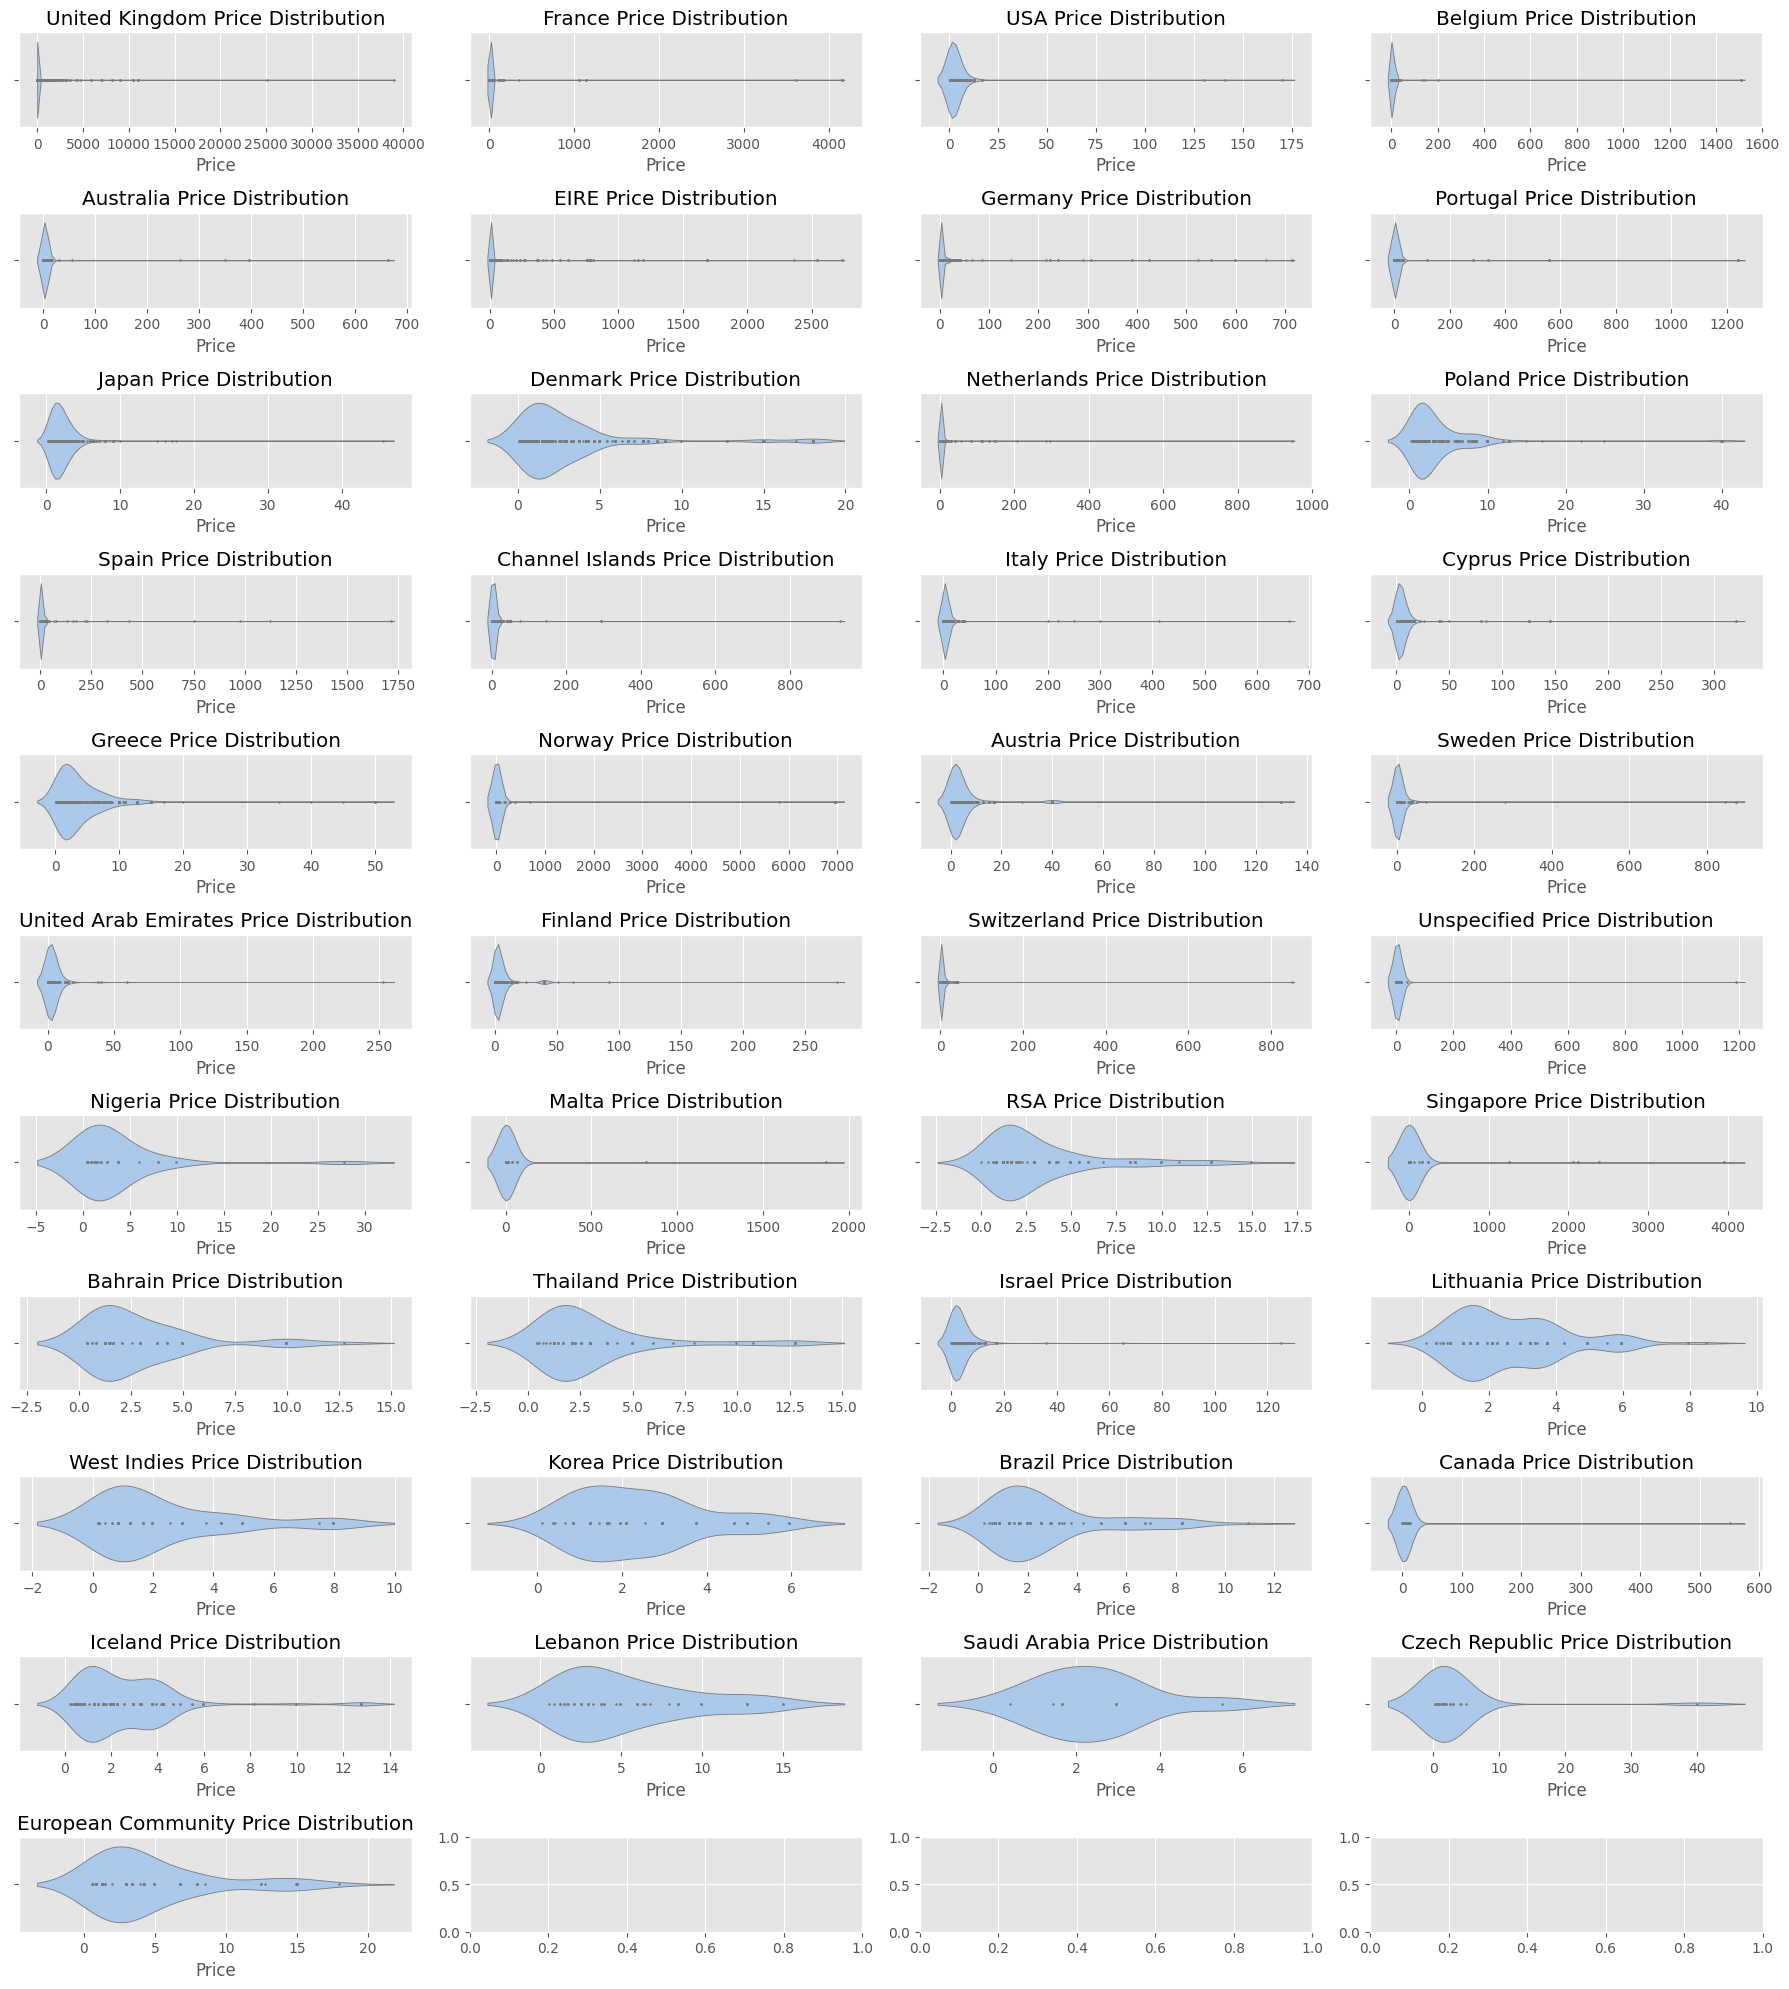

In [237]:
fig, ax = plt.subplots(11, 4, figsize=(18,20))
axes_ = [axes_row for axes in ax for axes_row in axes]

for i, c in enumerate(countries):
    sns.violinplot(x = "Price", data = data[data["Country"] == c], ax = axes_[i], inner = "point", palette = "pastel")
    axes_[i].set_title(c + ' ' + "Price Distribution")
    plt.tight_layout()

From the above plot what I can interpret is that most of the data is pretty skewed and there is lot's of high extreme values that are present in the data.

In [238]:
#Total Number of Unique Invoices
len(data["Invoice"].unique())

44876

In [239]:
temp_invoice_df = data.groupby("Invoice")[["Quantity"]].sum()

In [240]:
temp_invoice_df.reset_index(inplace = True)

In [241]:
#Below are the top 30 invoices with total quantity purchased by them
temp_invoice_df.sort_values(by = "Quantity", ascending = False).head(30).iloc[:,:2].style.background_gradient(cmap = "Blues")

,Invoice,Quantity
13425,524174,87167
11080,518505,87167
3064,497946,83774
36942,581483,80995
20348,541431,74215
4379,501534,63974
2096,495194,63302
4693,502269,40000
1604,493819,25018
1047,491812,20524


In [242]:
data.groupby(["Invoice"]).mean(numeric_only=True).head(15).iloc[:, [1]].sort_values("Price", ascending = False)

,Price
Invoice,
489444,141.000000
489447,130.000000
489434,4.081250
489436,3.730526
489437,3.628261
489439,3.560000
489440,3.150000
489446,3.118519
489441,3.042500


I have grouped the data by Invoice to see the average spend by Invoice Number. Here one thing interesting to see that the invoice with number **489444** & **489447** has outspent others. So to gain some better clarity, let's check these 2 invoices and get insights on how much quantity they have purchased so far.

In [243]:
data[(data["Invoice"] == 489444) | (data["Invoice"] == 489447)]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
126,489444,POST,POSTAGE,1,2009-12-01 09:55:00,141.0,12636.0,USA
173,489447,POST,POSTAGE,1,2009-12-01 10:10:00,130.0,12362.0,Belgium


As you can see above, These 2 invoices with invoice number **489444** and **489447** had only single transaction, that's why the average price was too high.

### **INITIAL EDA INSIGHTS:**

1) Most of the customers are from the United Kingdom followed by the Germany, EIRE & France.

2) If we check the average price sale by countries, what we have observed is that Singapore has the highest averge price sale followed by the Norway and Malta.

3) Most of the countries data is skewed when it comes to the Price feature with lots of higher extreme values.

4) There are total 44876 uniques purchased happend so far.

5) We have also observed some of the Invoices who have purchased most of the quantities within 2 year of span.

6) When it comes to the average spend there are 2 invoices with number 489444 and 489447 having the highest average spent but upon inspection we also found the average product purchase was only 1 which is from USA followed by Belgium.

In [244]:
#Let's look at the data once again & see what else insights we can get from the data itself
data.head(15)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom
5,489434,22064,PINK DOUGHNUT TRINKET POT,24,2009-12-01 07:45:00,1.65,13085.0,United Kingdom
6,489434,21871,SAVE THE PLANET MUG,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom
7,489434,21523,FANCY FONT HOME SWEET HOME DOORMAT,10,2009-12-01 07:45:00,5.95,13085.0,United Kingdom
8,489435,22350,CAT BOWL,12,2009-12-01 07:46:00,2.55,13085.0,United Kingdom
9,489435,22349,"DOG BOWL , CHASING BALL DESIGN",12,2009-12-01 07:46:00,3.75,13085.0,United Kingdom


### **Exploratory Data Analysis Continued.....**



<Axes: xlabel='Description'>

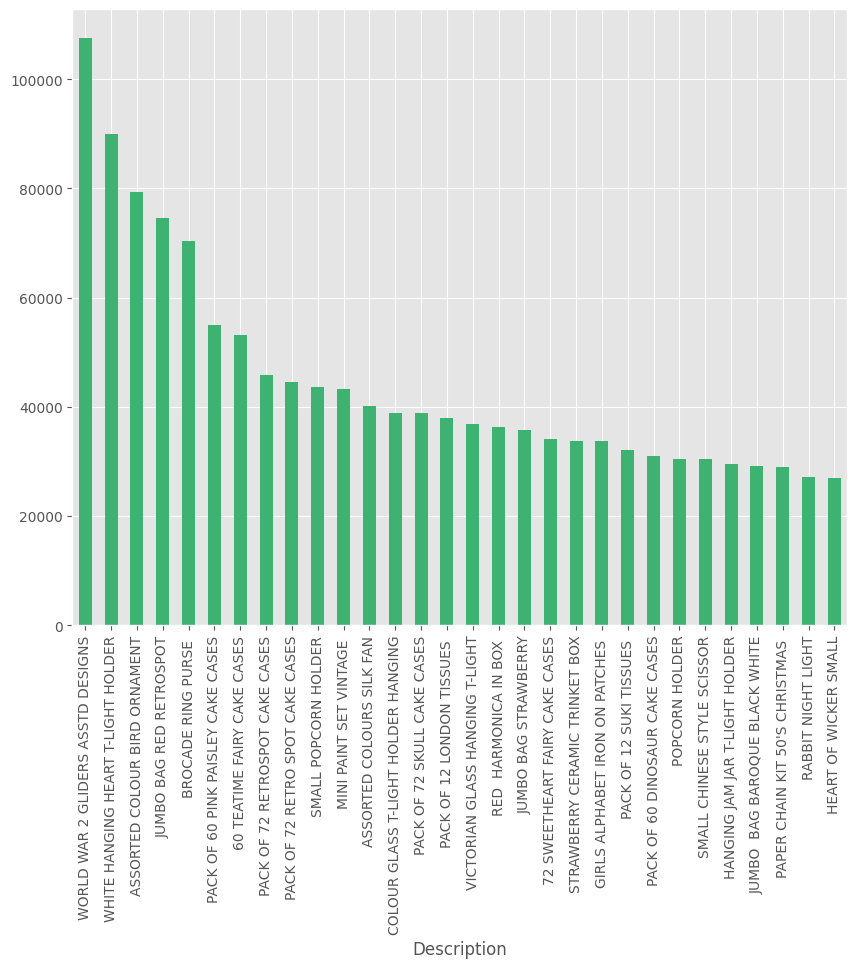

In [245]:
#Let's check which product has been purchased more often so far
plt.figure(figsize=(10,8))
data.groupby("Description")["Quantity"].sum().sort_values(ascending = False).head(30).plot(kind = "bar", color = 'mediumseagreen')

In [246]:
temp_data = data.copy()

In [247]:
temp_data.head(5)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [248]:
#Date Time Analysis
temp_data.loc[:, "Month"] = data.InvoiceDate.dt.month
temp_data.loc[:, "Time"] = data.InvoiceDate.dt.time
temp_data.loc[:, "Year"] = data.InvoiceDate.dt.year
temp_data.loc[:, "Day"] = data.InvoiceDate.dt.day
temp_data.loc[:, "Quarter"] = data.InvoiceDate.dt.quarter
temp_data.loc[:, "Day of Week"] = data.InvoiceDate.dt.dayofweek

In [249]:
#Mapping day of week
dayofweek_mapping = dict({0: "Monday",
                         1: "Tuesday",
                         2: "Wednesday" ,
                         3: "Thursday",
                         4: "Friday",
                         5: "Saturday",
                         6: "Sunday"})

In [250]:
temp_data["Day of Week"] = temp_data["Day of Week"].map(dayofweek_mapping)

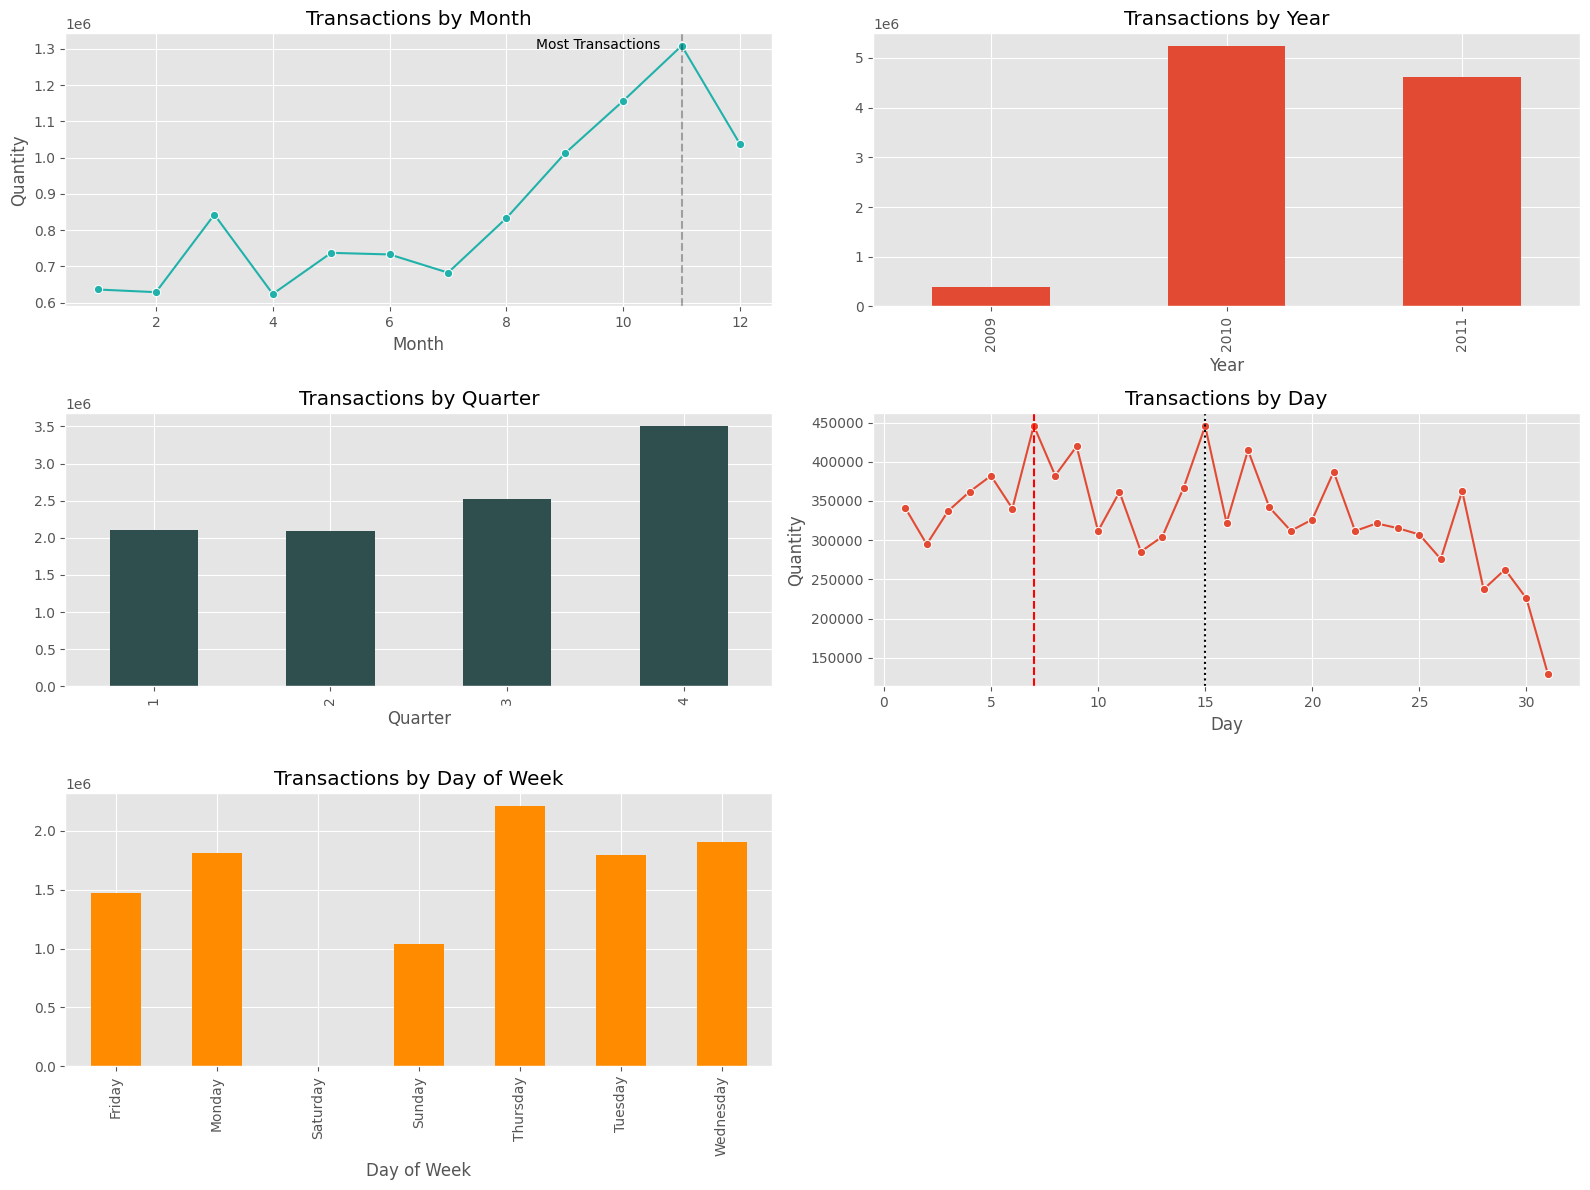

In [251]:
plt.figure(figsize=(16,12))
plt.subplot(3,2,1)
sns.lineplot(x = "Month", y = "Quantity", data = temp_data.groupby("Month").sum("Quantity"), marker = "o", color = "lightseagreen")
plt.axvline(11, color = "k", linestyle = '--', alpha = 0.3)
plt.text(8.50, 1.3e6, "Most Transactions")
plt.title("Transactions by Month")
plt.subplot(3,2,2)
temp_data.groupby("Year")["Quantity"].sum().plot(kind = "bar")
plt.title("Transactions by Year")
plt.subplot(3,2,3)
temp_data.groupby("Quarter")["Quantity"].sum().plot(kind = "bar", color = "darkslategrey")
plt.title("Transactions by Quarter")
plt.subplot(3,2,4)
sns.lineplot(x = "Day", y = "Quantity", data = temp_data.groupby("Day").sum("Quantity"), marker = "o", )
plt.axvline(7, color = 'r', linestyle = '--')
plt.axvline(15, color = 'k', linestyle = "dotted")
plt.title("Transactions by Day")
plt.subplot(3,2,5)
temp_data.groupby("Day of Week")["Quantity"].sum().plot(kind = "bar", color = "darkorange")
plt.title("Transactions by Day of Week")
plt.tight_layout()
plt.show()

As we can see, in 2009 the transactions is quite low as compared to 2010 and 2011. But as if now, we don't know the reason behind this so let's investigate why 2009 is low as compared to other 2 years.

In [252]:
print("Total Number of Countries in 2009: {}".format(len(temp_data[temp_data["Year"] == 2009]["Country"].unique())))
print("Total Number of Transactions in 2009: {}".format(temp_data[temp_data["Year"] == 2009]["Quantity"].sum()))
print("--------------------------------------------")
print("Total Number of Countries in 2009: {}".format(len(temp_data[temp_data["Year"] == 2010]["Country"].unique())))
print("Total Number of Transactions in 2009: {}".format(temp_data[temp_data["Year"] == 2010]["Quantity"].sum()))
print("--------------------------------------------")
print("Total Number of Countries in 2009: {}".format(len(temp_data[temp_data["Year"] == 2011]["Country"].unique())))
print("Total Number of Transactions in 2009: {}".format(temp_data[temp_data["Year"] == 2011]["Quantity"].sum()))

Total Number of Countries in 2009: 23
Total Number of Transactions in 2009: 390286
--------------------------------------------
Total Number of Countries in 2009: 37
Total Number of Transactions in 2009: 5233315
--------------------------------------------
Total Number of Countries in 2009: 36
Total Number of Transactions in 2009: 4610527


Through this analysis what conclusion we can make is that may be the company has started their operations in other countries and started to expand their business further.

In [253]:
_2009 = temp_data[temp_data["Year"] == 2009]["Country"].unique()
_2010 = temp_data[temp_data["Year"] == 2010]["Country"].unique()
_2011 = temp_data[temp_data["Year"] == 2011]["Country"].unique()

In [254]:
no_cols = []

for i in (_2010):
    if i not in _2009:
        no_cols.append(i)
print("These are the values which are not present in 2009: {}".format(no_cols))

These are the values which are not present in 2009: ['Unspecified', 'Nigeria', 'Malta', 'RSA', 'Singapore', 'Bahrain', 'Thailand', 'Israel', 'Lithuania', 'West Indies', 'Korea', 'Brazil', 'Canada', 'Iceland']


In [255]:
temp = data.groupby(["Country", "Description"])["Quantity"].sum()

In [256]:
temp = pd.DataFrame(temp)

### Top 8 Countries With Most Transactions

In [257]:
top_8_countries = ["United Kingdom", "Netherlands", "EIRE", "Denmark", "Germany", "France", "Australia", "Sweden"]

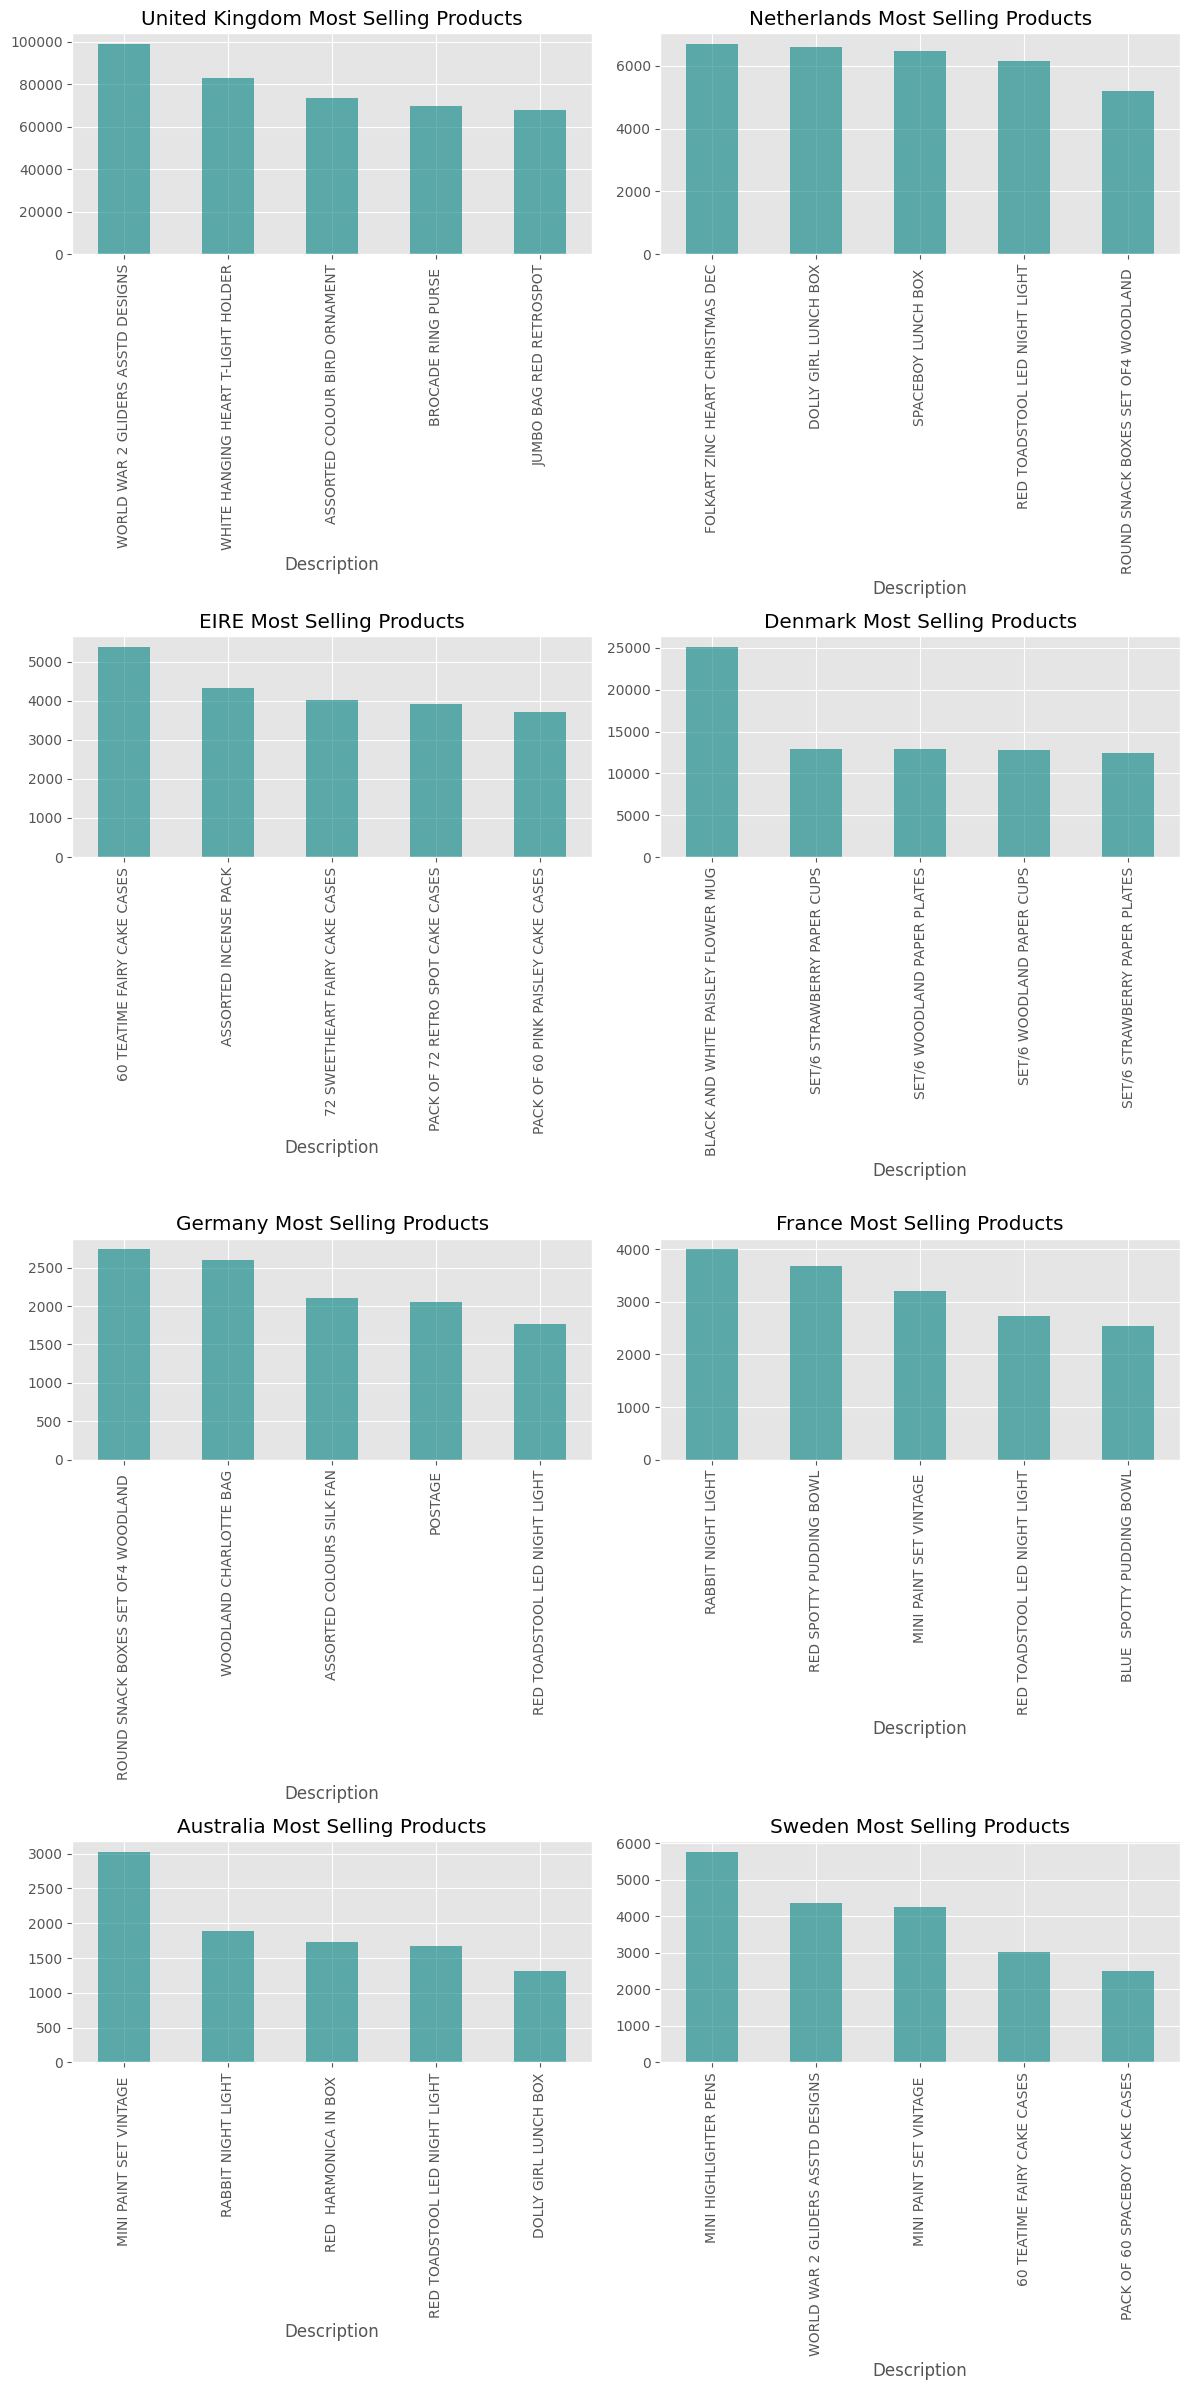

In [258]:
x = 1
plt.figure(figsize=(12,24))
for x, c in enumerate(top_8_countries):
    ax = plt.subplot(4,2, x+1)
    plt.title(c + ' '+ "Most Selling Products")
    temp.loc[c].sort_values(by = "Quantity", ascending = False)["Quantity"].head(5).plot(kind = "bar", ax = ax, color = "teal", alpha = 0.6)
    plt.tight_layout()

### Top 8 Countries with Least Transactions

In [259]:
least_8_country = ["Saudi Arabia", "Nigeria", "Lebanon", "West Indies", "European Community", "Brazil", "Czech Republic", "Korea"]

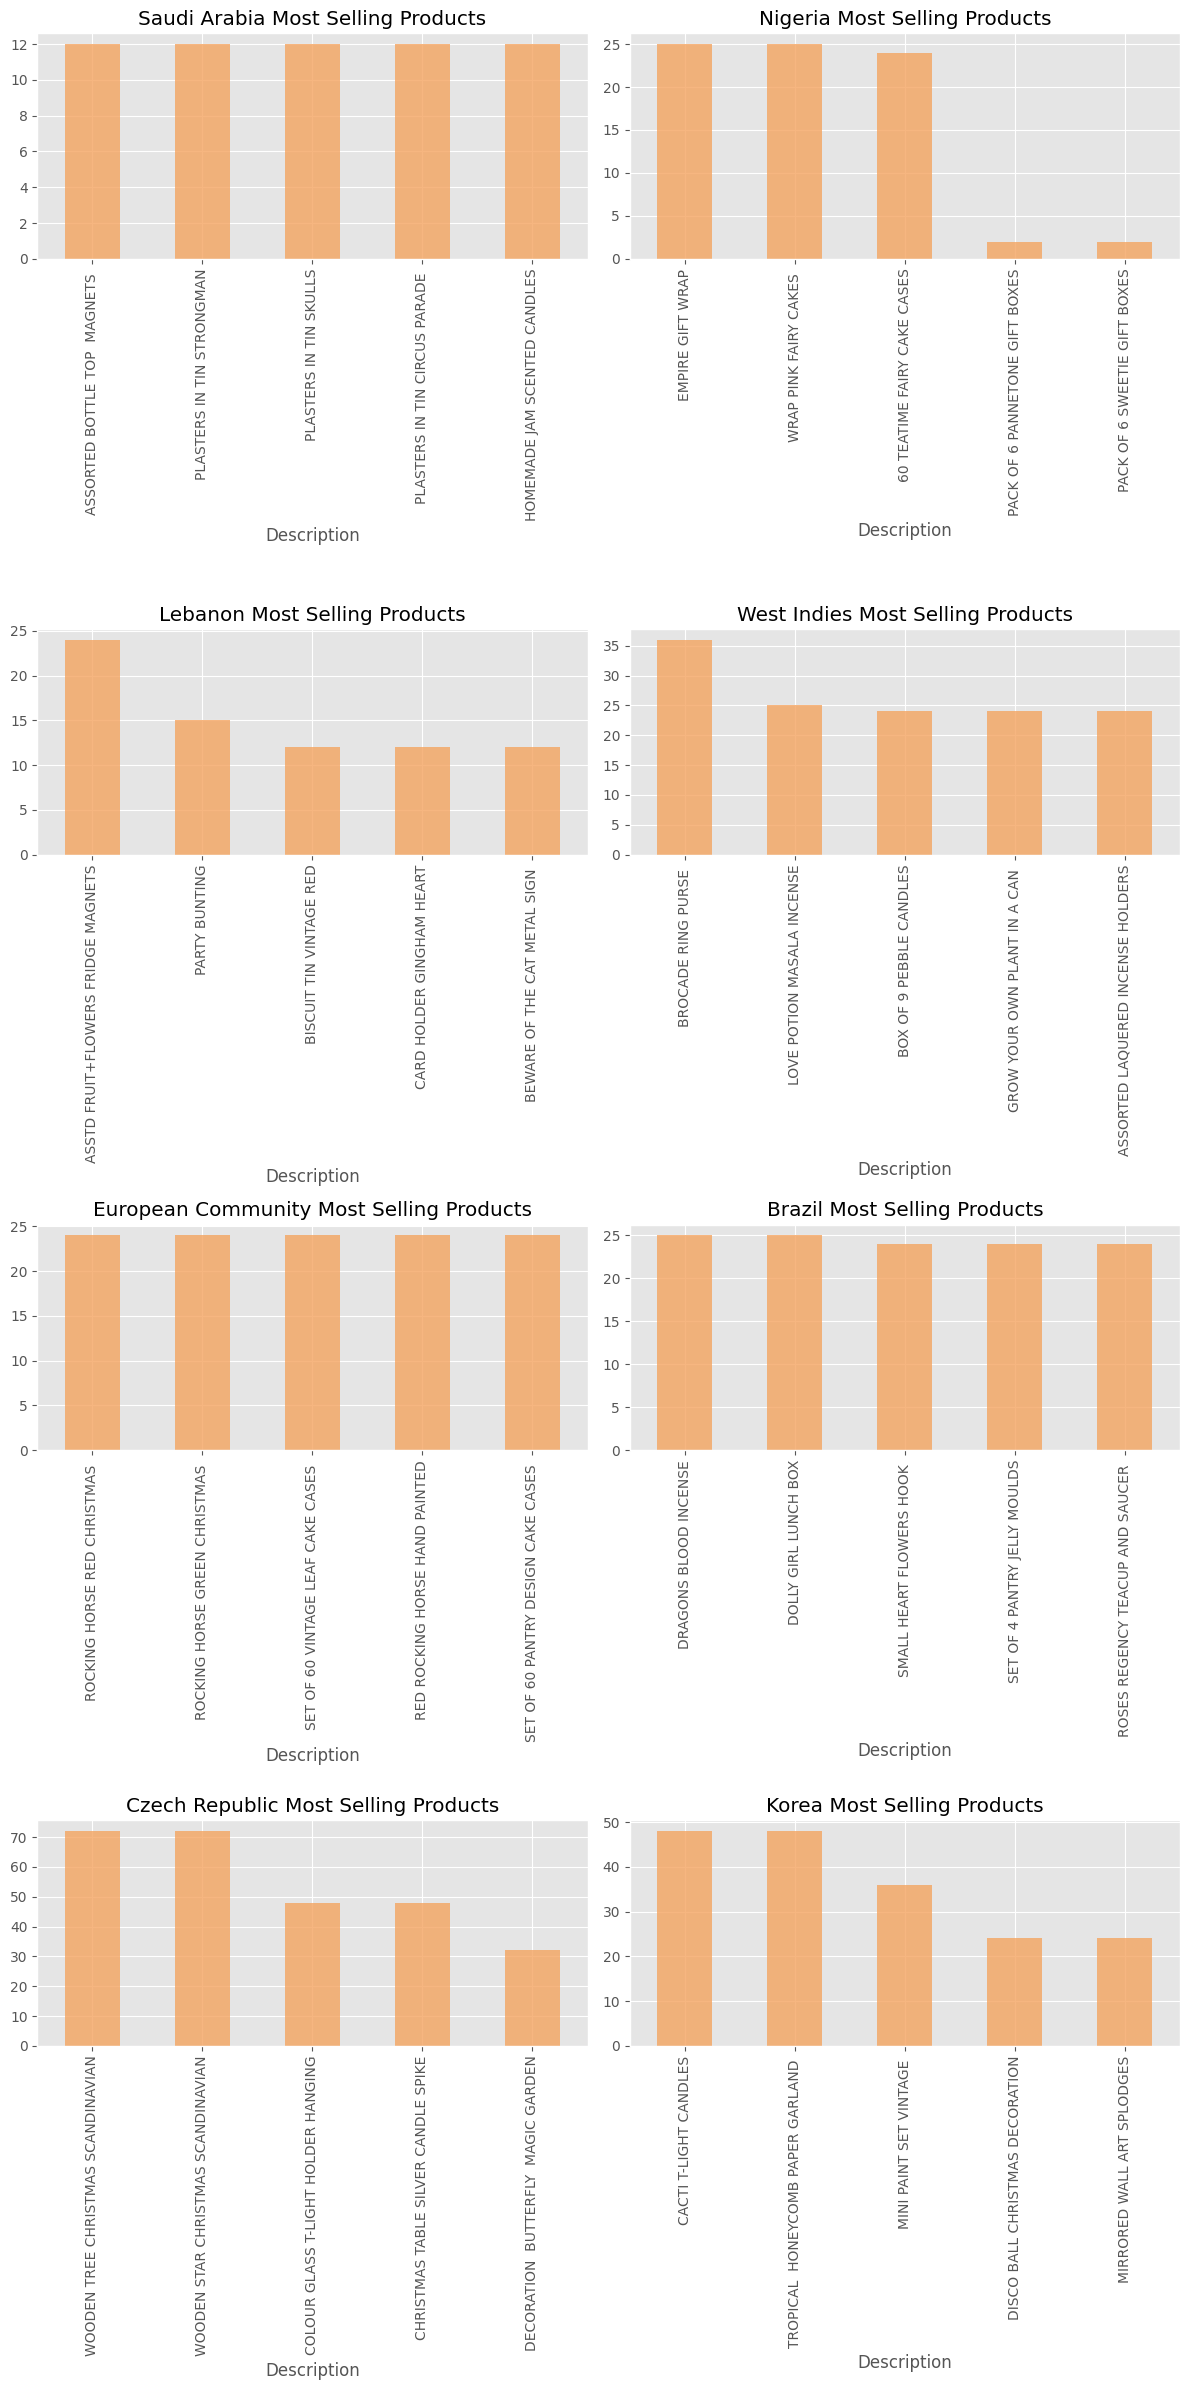

In [260]:
x = 1
plt.figure(figsize=(12,24))
for x, c in enumerate(least_8_country):
    ax = plt.subplot(4,2, x+1)
    plt.title(c + ' '+ "Most Selling Products")
    temp.loc[c].sort_values(by = "Quantity", ascending = False)["Quantity"].head(5).plot(kind = "bar", ax = ax, color = "sandybrown", alpha = 0.8)

    plt.tight_layout()

### **EDA INSIGHTS:**


1) Our Top 5 Best Selling Products are **World War 2 Gliders**, **White Hanging Heart**, **Assorted Colour Bird**, **Jumbo Bag Red**, **Brocade Ring**.

2) Most Transactions happened in the month of Novemeber which is evident due to festive seasons.

3) 2010 is the year in which we have the most transactions followed by the 2011

4) Q4 being the highest when it comes transactions.

5) It also observed that in the end of the 1st week and starting of the 3rd week, people tends to buy more.

6) People loves to shop on Thursday followed by Tuesday and Wednesday.


### RFM Estimation - (Recency, Frequency, Monetary)

In [261]:
data.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [262]:
data["Total Amount"] = data["Quantity"]*data["Price"]

In [263]:
data.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,Total Amount
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom,83.4
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom,81.0
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom,100.8
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom,30.0


In [264]:
!pip install lifetimes
import lifetimes

In [265]:
rfm_summary = lifetimes.utils.summary_data_from_transaction_data(data, "Customer ID", "InvoiceDate", "Total Amount")

In [266]:
rfm_summary.head()

,frequency,recency,T,monetary_value
Customer ID,,,,
12346.0,10.0,400.0,725.0,-15.468000
12347.0,7.0,402.0,404.0,717.398571
12348.0,4.0,363.0,438.0,449.310000
12349.0,4.0,717.0,735.0,1107.172500
12350.0,0.0,0.0,310.0,0.000000


In [267]:
rfm_summary.reset_index(inplace = True)

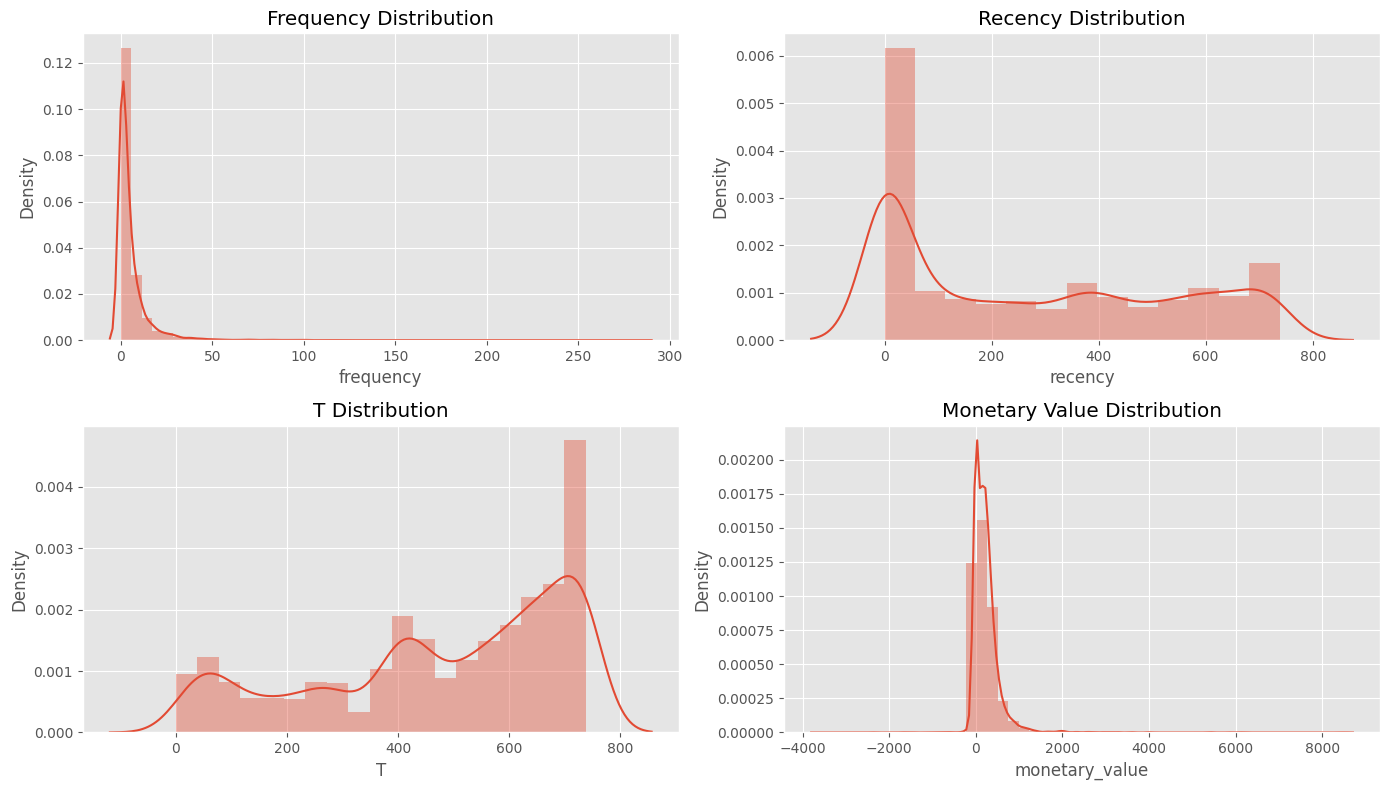

In [268]:
#plotting the distribution
plt.figure(figsize=(14,8))
plt.subplot(221)
sns.distplot(rfm_summary["frequency"])
plt.title("Frequency Distribution")
plt.subplot(222)
sns.distplot(rfm_summary["recency"])
plt.title("Recency Distribution")
plt.subplot(223)
sns.distplot(rfm_summary["T"])
plt.title("T Distribution")
plt.subplot(224)
sns.distplot(rfm_summary["monetary_value"])
plt.title("Monetary Value Distribution")
plt.tight_layout()

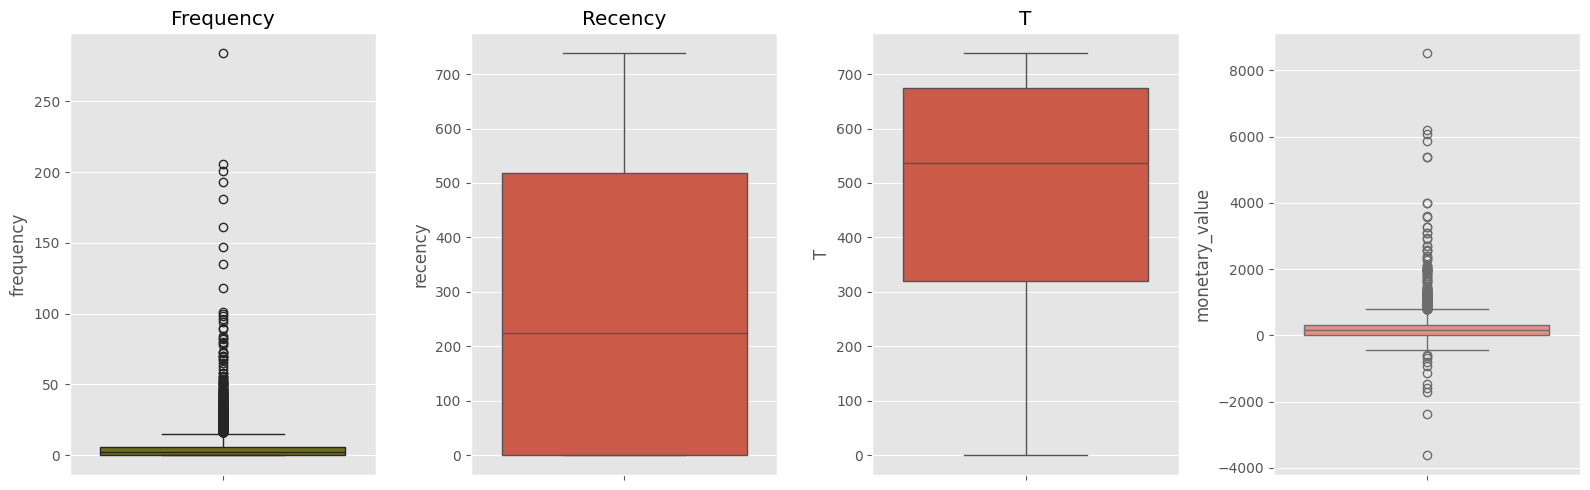

In [269]:
plt.figure(figsize=(16,5))
plt.subplot(141)
sns.boxplot(rfm_summary["frequency"], color = "olive")
plt.title("Frequency")
plt.subplot(142)
sns.boxplot(rfm_summary["recency"])
plt.title("Recency")
plt.subplot(143)
sns.boxplot(rfm_summary["T"])
plt.title("T")
plt.subplot(144)
sns.boxplot(rfm_summary["monetary_value"], color = "salmon")

plt.tight_layout()

In [270]:
rfm_summary.describe(percentiles = [0.01,0.1,0.25,0.50,0.75,0.90,0.99])

,Customer ID,frequency,recency,T,monetary_value
count,5942.000000,5942.000000,5942.000000,5942.000000,5942.000000
mean,15316.500000,5.479636,275.772299,478.229384,228.814496
std,1715.451981,11.293673,259.830840,223.879537,363.067124
min,12346.000000,0.000000,0.000000,0.000000,-3610.500000
1%,12405.410000,0.000000,0.000000,15.000000,-40.623900
10%,12940.100000,0.000000,0.000000,89.000000,0.000000
25%,13831.250000,0.000000,0.000000,320.500000,0.000000
50%,15316.500000,2.000000,225.000000,536.000000,174.900625
75%,16801.750000,6.000000,518.000000,674.000000,314.594375
90%,17692.900000,13.000000,672.900000,731.000000,502.095625


As we can see how are frequency changing from 90 percentile to 99 percentile but same not the case with the recency as there is no much jump in the numbers so we can clearly see from there as well as there are some extreme values contains both in the frequency and monetary value.

## PARETO/NBD MODEL

In [271]:
from lifetimes.plotting import plot_frequency_recency_matrix
from lifetimes.plotting import plot_probability_alive_matrix
from lifetimes.plotting import plot_period_transactions
from lifetimes.utils import calibration_and_holdout_data
from lifetimes import ParetoNBDFitter
from lifetimes.plotting import plot_history_alive
from sklearn.metrics import mean_squared_error, r2_score
import math
from math import sqrt

In [272]:
def get_model(data, penalizer_val, time):

    pareto_result = data.copy()

    pareto_model = ParetoNBDFitter(penalizer_coef = penalizer_val)
    pareto_model.fit(pareto_result["frequency"], pareto_result["recency"], pareto_result["T"])

    #calculating the predicted_purchases

    t = time

    pareto_result["predicted_purchases"] = pareto_model.conditional_expected_number_of_purchases_up_to_time(t, pareto_result["frequency"], pareto_result["recency"], pareto_result["T"])


    pareto_result["Actual_Purchases"] = pareto_result["frequency"]/pareto_result["recency"]*time

    #filling the null values
    pareto_result["Actual_Purchases"].fillna(0, inplace = True)


    #calculating the error
    pareto_result["Prediction_Error"] = pareto_result["Actual_Purchases"]-pareto_result["predicted_purchases"]

    #calcuating the purchase prediction error
    pareto_mse_purchase = mean_squared_error(pareto_result["Actual_Purchases"], pareto_result["predicted_purchases"])
    pareto_r2_purchase = r2_score(pareto_result["Actual_Purchases"], pareto_result["predicted_purchases"])
    pareto_rmse_purchase = sqrt(mean_squared_error(pareto_result["Actual_Purchases"], pareto_result["predicted_purchases"]))
    pareto_avg_error_purchase = pareto_result["Prediction_Error"].mean()

    #printing the purchase prediction error
    print("Predicted Purchase Mean Squared Error: %s" %(pareto_mse_purchase))
    print("Predicted Purchase R2 Score: %s" %(pareto_r2_purchase))
    print("Predicted Purchase Root Mean Squared Error: %s" %(pareto_rmse_purchase))
    print("Predicted Purchase Average Purchases Error: %s" %(pareto_avg_error_purchase))


    #plotting the prediction v/s actual purchase plot
    plt.figure(figsize=(6,4))
    plt.errorbar(pareto_result["Actual_Purchases"], pareto_result["predicted_purchases"], yerr=abs(pareto_result["Prediction_Error"]), fmt='o', color='darkseagreen',
                 ecolor='grey', elinewidth=1.5, capsize=0, alpha = 0.2);
    plt.title("Prediction v/s Actual")

Predicted Purchase Mean Squared Error: 4.335934568785449
Predicted Purchase R2 Score: 0.004258462996240553
Predicted Purchase Root Mean Squared Error: 2.0822907022760893
Predicted Purchase Average Purchases Error: 0.41236544982116097


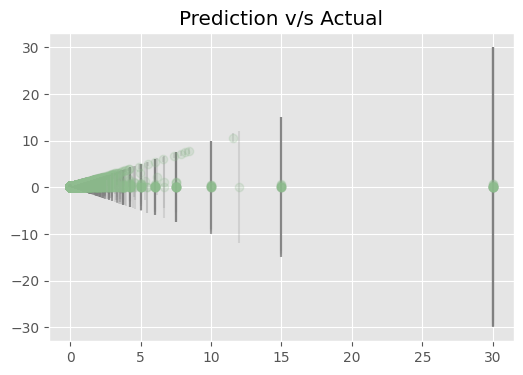

In [273]:
get_model(rfm_summary, 0.001, 30)

Based on the above errors, we have found that penalizer_coef = 0.1 is doing slightly better at minimizing the errors so we will be using 0.1 for our model.

In [274]:
pareto_model = lifetimes.ParetoNBDFitter(penalizer_coef = 0.1)

In [275]:
pareto_model.fit(rfm_summary["frequency"],rfm_summary["recency"],
                rfm_summary["T"])

<lifetimes.ParetoNBDFitter: fitted with 5942 subjects, alpha: 63.87, beta: 124.21, r: 0.83, s: 0.16>

<Axes: title={'center': 'Expected Number of Future Purchases for 1 Unit of Time,\nby Frequency and Recency of a Customer'}, xlabel="Customer's Historical Frequency", ylabel="Customer's Recency">

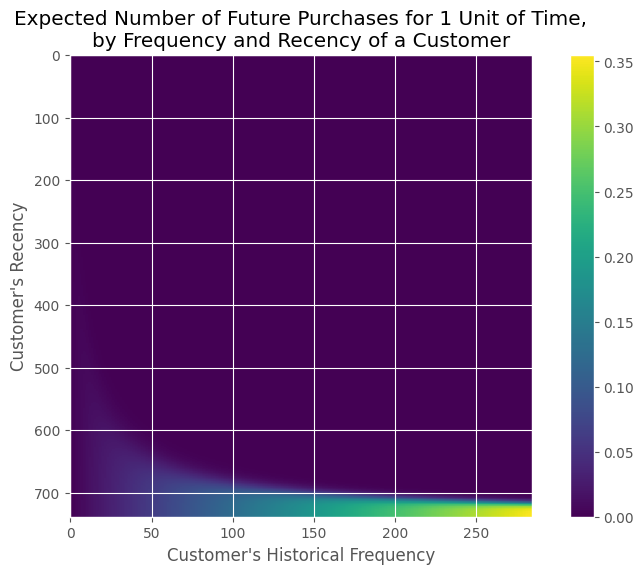

In [276]:
plt.figure(figsize=(10,6))
plot_frequency_recency_matrix(pareto_model)

<Axes: title={'center': 'Probability Customer is Alive,\nby Frequency and Recency of a Customer'}, xlabel="Customer's Historical Frequency", ylabel="Customer's Recency">

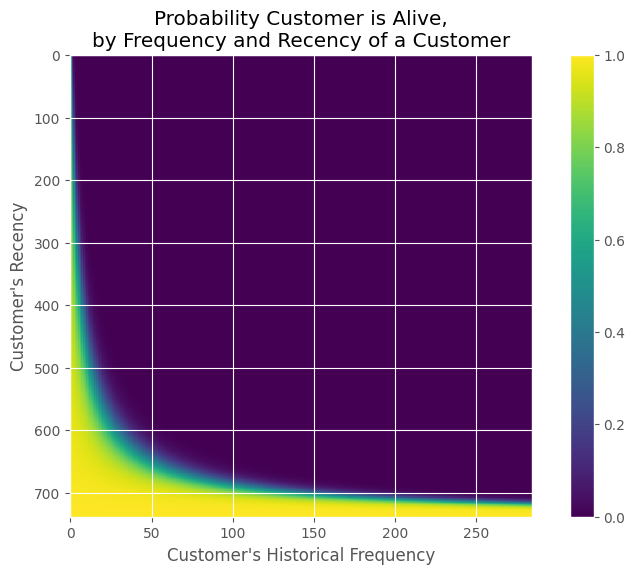

In [277]:
plt.figure(figsize=(10,6))
plot_probability_alive_matrix(pareto_model)

In [278]:
pareto_result = rfm_summary.copy()

In [279]:
pareto_result["p_not_alive"] = 1-pareto_model.conditional_probability_alive(pareto_result["frequency"], pareto_result["recency"], pareto_result["T"])
pareto_result["p_alive"] = pareto_model.conditional_probability_alive(pareto_result["frequency"], pareto_result["recency"], pareto_result["T"])

In [280]:
pareto_result.head()

,Customer ID,frequency,recency,T,monetary_value,p_not_alive,p_alive
0,12346.0,10.0,400.0,725.0,-15.468000,0.819891,0.180109
1,12347.0,7.0,402.0,404.0,717.398571,0.000634,0.999366
2,12348.0,4.0,363.0,438.0,449.310000,0.034895,0.965105
3,12349.0,4.0,717.0,735.0,1107.172500,0.003674,0.996326
4,12350.0,0.0,0.0,310.0,0.000000,0.334744,0.665256


In [281]:
t = 30
pareto_result["predicted_purchases"] = pareto_model.conditional_expected_number_of_purchases_up_to_time(t, pareto_result["frequency"], pareto_result["recency"], pareto_result["T"])

In [282]:
pareto_result

,Customer ID,frequency,recency,T,monetary_value,p_not_alive,p_alive,predicted_purchases
0,12346.0,10.0,400.0,725.0,-15.468000,0.819891,0.180109,0.073997
1,12347.0,7.0,402.0,404.0,717.398571,0.000634,0.999366,0.499741
2,12348.0,4.0,363.0,438.0,449.310000,0.034895,0.965105,0.277710
3,12349.0,4.0,717.0,735.0,1107.172500,0.003674,0.996326,0.180374
4,12350.0,0.0,0.0,310.0,0.000000,0.334744,0.665256,0.044305
...,...,...,...,...,...,...,...,...
5937,18283.0,18.0,655.0,658.0,146.405556,0.000657,0.999343,0.779793
5938,18284.0,1.0,2.0,431.0,-25.000000,0.730097,0.269903,0.029887
5939,18285.0,0.0,0.0,660.0,0.000000,0.523576,0.476424,0.016428
5940,18286.0,2.0,247.0,723.0,362.740000,0.417540,0.582460,0.062766


<Axes: title={'center': 'Frequency of Repeat Transactions'}, xlabel='Number of Calibration Period Transactions', ylabel='Customers'>

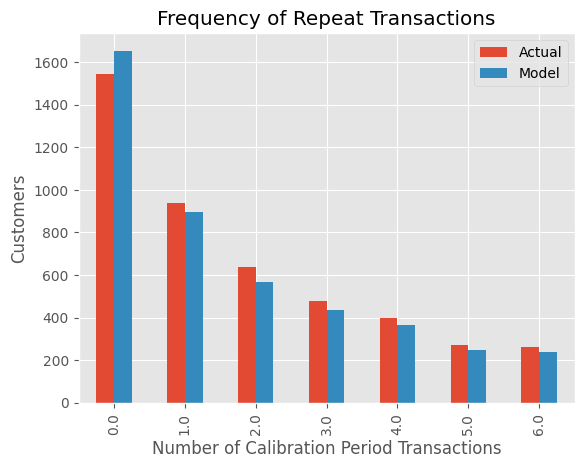

In [283]:
plot_period_transactions(pareto_model)

In [284]:
#dividing our dataset into training & holdout
pareto_summary_cal_holdout = calibration_and_holdout_data(data, "Customer ID", "InvoiceDate",
                                                   calibration_period_end = '2011-06-08',
                                                  observation_period_end = '2011-12-09')

In [285]:
pareto_summary_cal_holdout.head()

,frequency_cal,recency_cal,T_cal,frequency_holdout,duration_holdout
Customer ID,,,,,
12346.0,10.0,400.0,541.0,0.0,184.0
12347.0,3.0,158.0,220.0,4.0,184.0
12348.0,3.0,190.0,254.0,1.0,184.0
12349.0,3.0,328.0,551.0,1.0,184.0
12350.0,0.0,0.0,126.0,0.0,184.0


In [286]:
pareto_model.fit(pareto_summary_cal_holdout["frequency_cal"],
               pareto_summary_cal_holdout["recency_cal"],
               pareto_summary_cal_holdout["T_cal"])

<lifetimes.ParetoNBDFitter: fitted with 5025 subjects, alpha: 63.81, beta: 801.34, r: 0.83, s: 0.76>

In [287]:
from lifetimes.plotting import plot_calibration_purchases_vs_holdout_purchases

<Axes: title={'center': 'Actual Purchases in Holdout Period vs Predicted Purchases'}, xlabel='Purchases in calibration period', ylabel='Average of Purchases in Holdout Period'>

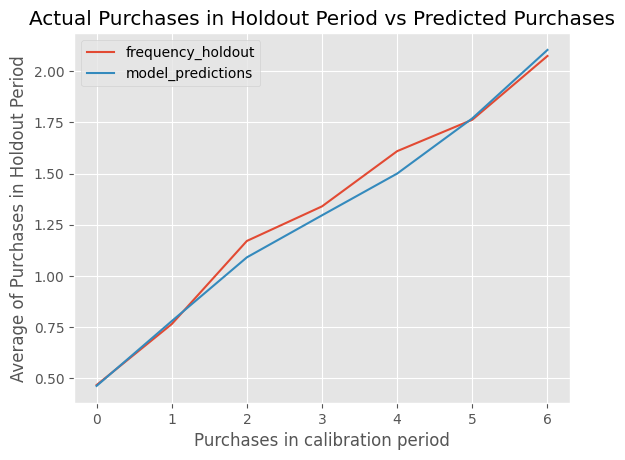

In [288]:
plot_calibration_purchases_vs_holdout_purchases(pareto_model, pareto_summary_cal_holdout)

In [289]:
pareto_summary_cal_holdout.head()

,frequency_cal,recency_cal,T_cal,frequency_holdout,duration_holdout
Customer ID,,,,,
12346.0,10.0,400.0,541.0,0.0,184.0
12347.0,3.0,158.0,220.0,4.0,184.0
12348.0,3.0,190.0,254.0,1.0,184.0
12349.0,3.0,328.0,551.0,1.0,184.0
12350.0,0.0,0.0,126.0,0.0,184.0


In [290]:
pareto_result["actual30"] = pareto_result["frequency"]/pareto_result["recency"]*30

In [291]:
pareto_result["actual30"].fillna(0, inplace = True)

In [292]:
pareto_result["error"] = pareto_result["actual30"]-pareto_result["predicted_purchases"]

In [293]:
pareto_result.head()

,Customer ID,frequency,recency,T,monetary_value,p_not_alive,p_alive,predicted_purchases,actual30,error
0,12346.0,10.0,400.0,725.0,-15.468000,0.819891,0.180109,0.073997,0.750000,0.676003
1,12347.0,7.0,402.0,404.0,717.398571,0.000634,0.999366,0.499741,0.522388,0.022647
2,12348.0,4.0,363.0,438.0,449.310000,0.034895,0.965105,0.277710,0.330579,0.052869
3,12349.0,4.0,717.0,735.0,1107.172500,0.003674,0.996326,0.180374,0.167364,-0.013010
4,12350.0,0.0,0.0,310.0,0.000000,0.334744,0.665256,0.044305,0.000000,-0.044305


In [294]:
def get_metrics(true, predicted, error):

    print("Mean Squared Error: %s"%(mean_squared_error(true, predicted)))
    print("Root Mean Squared Error: %s"%(sqrt(mean_squared_error(true, predicted))))
    print("R2 Score: %s"%(r2_score(true, predicted)))

    # Specify x, y, and size as keyword arguments
    sns.scatterplot(x=true, y=predicted, size=error, color = "darkolivegreen")
    plt.title("Actual Purchase v/s Predicted Purchase")
    plt.show()

Mean Squared Error: 4.335930944167503
Root Mean Squared Error: 2.0822898319320253
R2 Score: 0.0042592953848726856


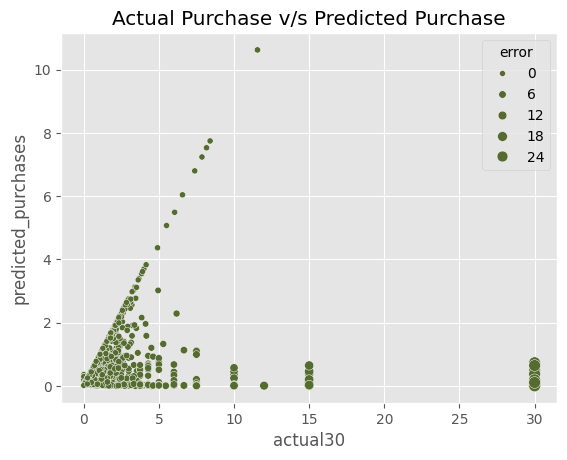

In [295]:
get_metrics(pareto_result["actual30"], pareto_result["predicted_purchases"], pareto_result["error"])

In [296]:
from lifetimes.plotting import plot_history_alive

In [297]:
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'], errors='coerce')  # ensure datetime
data['InvoiceDate'] = data['InvoiceDate'].dt.strftime('%Y-%m-%d')  # format to string




def get_history_alive(t_, data_, id_):

    individual_alive = data[data["Customer ID"] == id_]
    plot_history_alive(pareto_model, t = t_, transactions = individual_alive, datetime_col = "InvoiceDate",
                  freq = "D")

In [298]:
print(data.dtypes)

Invoice          object
StockCode        object
Description      object
Quantity          int64
InvoiceDate      object
Price           float64
Customer ID     float64
Country          object
Total Amount    float64
dtype: object


ConversionError: Failed to convert value(s) to axis units: '2009-12-08'

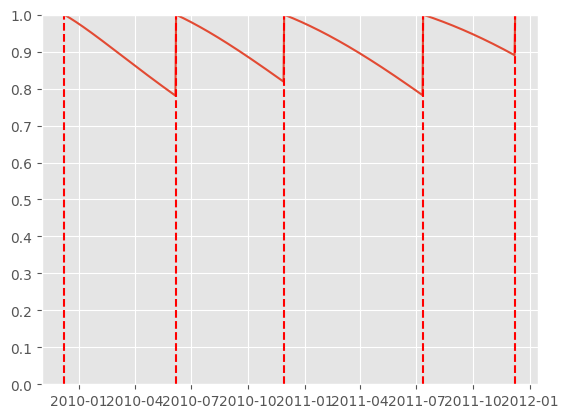

In [299]:
get_history_alive(30, data, 12358.0)

## GAMMA-GAMMA MODEL

Before proceding with our Gamma Gamma Model, we have to first filter the data where we are going to remove the values with 0 frequency and monetary values.

In [300]:
idx = pareto_result[(pareto_result["frequency"] <= 0.0)]

In [301]:
idx = idx.index

In [302]:
ggf_filter = pareto_result.drop(idx, axis = 0)

In [303]:
m_idx = ggf_filter[(ggf_filter["monetary_value"] <= 0.0)].index

In [304]:
ggf_filter = ggf_filter.drop(m_idx, axis = 0)

In [305]:
ggf_filter.reset_index().drop("index", axis = 1, inplace = True)

<Axes: >

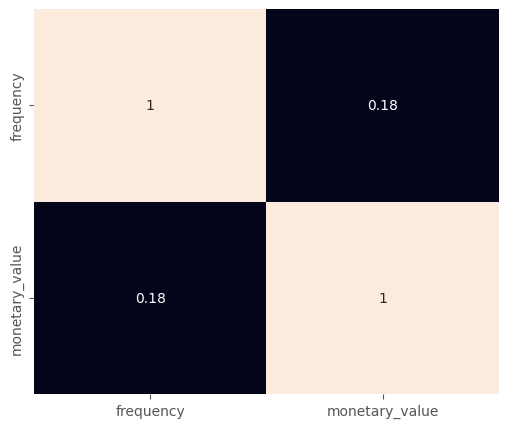

In [306]:
plt.figure(figsize=(6,5))
sns.heatmap(ggf_filter[["frequency", "monetary_value"]].corr(), annot = True, cbar = False)

In [307]:
ggf_model =  lifetimes.GammaGammaFitter(penalizer_coef=0.1)

In [308]:
ggf_model.fit(ggf_filter["frequency"], ggf_filter["monetary_value"])

<lifetimes.GammaGammaFitter: fitted with 4185 subjects, p: 1.02, q: 0.19, v: 0.95>

In [309]:
ggf_model.summary

,coef,se(coef),lower 95% bound,upper 95% bound
p,1.023190,0.024652,0.974873,1.071508
q,0.185956,0.003114,0.179852,0.192060
v,0.947145,0.025498,0.897169,0.997122


In [310]:
ggf_filter["expected_avg_sales_"] = ggf_model.conditional_expected_average_profit(ggf_filter["frequency"],
                                                                                     ggf_filter["monetary_value"])

In [311]:
ggf_filter.head()

,Customer ID,frequency,recency,T,monetary_value,p_not_alive,p_alive,predicted_purchases,actual30,error,expected_avg_sales_
1,12347.0,7.0,402.0,404.0,717.398571,0.000634,0.999366,0.499741,0.522388,0.022647,809.543574
2,12348.0,4.0,363.0,438.0,449.310000,0.034895,0.965105,0.277710,0.330579,0.052869,561.160804
3,12349.0,4.0,717.0,735.0,1107.172500,0.003674,0.996326,0.180374,0.167364,-0.013010,1382.358199
6,12352.0,8.0,356.0,392.0,218.182500,0.017281,0.982719,0.568668,0.674157,0.105490,242.408202
7,12353.0,1.0,204.0,408.0,89.000000,0.126935,0.873065,0.101370,0.147059,0.045689,440.041239


In [312]:
print("Mean Squared Error: %s" %(mean_squared_error(ggf_filter["monetary_value"], ggf_filter["expected_avg_sales_"])))
print("Root Mean Squared Error: %s" %(sqrt(mean_squared_error(ggf_filter["monetary_value"], ggf_filter["expected_avg_sales_"]))))
print("R2 Score: %s" %(r2_score(ggf_filter["monetary_value"], ggf_filter["expected_avg_sales_"])))

Mean Squared Error: 793392.8848688124
Root Mean Squared Error: 890.7260436682046
R2 Score: -4.485799230635767


In [313]:
ggf_filter["predicted_clv"] = ggf_model.customer_lifetime_value(pareto_model,
                                                       ggf_filter["frequency"],
                                                       ggf_filter["recency"],
                                                       ggf_filter["T"],
                                                       ggf_filter["monetary_value"],
                                                       time = 30,
                                                       freq = 'D',
                                                       discount_rate = 0.01)

In [314]:
#Top 5 customers with high CLV
ggf_filter[["Customer ID", "predicted_clv"]].sort_values(by = "predicted_clv", ascending = False).head(5)

,Customer ID,predicted_clv
5756,18102.0,494032.814713
2300,14646.0,426704.412842
5104,17450.0,252496.065476
1810,14156.0,239242.456161
1750,14096.0,225594.539175


In [315]:
# Assuming 5% of Profit Margin
ggf_filter["profit_margin"] = ggf_filter["predicted_clv"]*0.05

In [316]:
ggf_filter.reset_index().drop("index", axis = 1, inplace = True)

In [317]:
#exporting the result to csv
ggf_filter.to_csv("customer_lifetime_value_prediction.csv")

## CUSTOMER SEGMENTATION USING PREDICTED CLV

We have calculated the CLV and deliver the same to the marketing team but now marketing team is interested to know the most profitable customers segment which they can target the deliver the best optimized campaigns.

Our work is to deliver the requested data to the marketing team & to perform the same we will be going to perform the clustering on the predicted metrics.

In [318]:
ggf_filter.head()

,Customer ID,frequency,recency,T,monetary_value,p_not_alive,p_alive,predicted_purchases,actual30,error,expected_avg_sales_,predicted_clv,profit_margin
1,12347.0,7.0,402.0,404.0,717.398571,0.000634,0.999366,0.499741,0.522388,0.022647,809.543574,8446.886294,422.344315
2,12348.0,4.0,363.0,438.0,449.310000,0.034895,0.965105,0.277710,0.330579,0.052869,561.160804,3153.812357,157.690618
3,12349.0,4.0,717.0,735.0,1107.172500,0.003674,0.996326,0.180374,0.167364,-0.013010,1382.358199,5372.047778,268.602389
6,12352.0,8.0,356.0,392.0,218.182500,0.017281,0.982719,0.568668,0.674157,0.105490,242.408202,2827.890024,141.394501
7,12353.0,1.0,204.0,408.0,89.000000,0.126935,0.873065,0.101370,0.147059,0.045689,440.041239,844.422261,42.221113


In [319]:
col = ["predicted_purchases", "expected_avg_sales_", "predicted_clv", "profit_margin"]

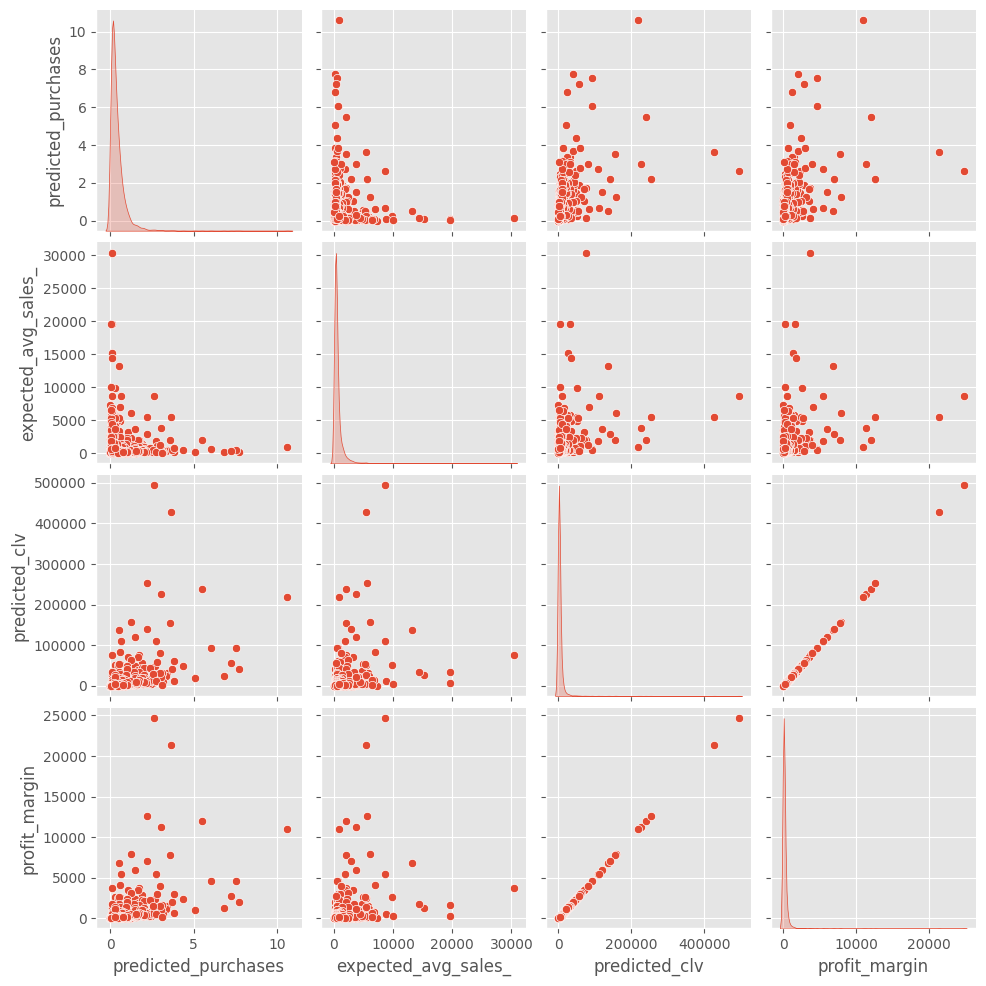

In [320]:
sns.pairplot(ggf_filter[col], diag_kind = "kde")

In [321]:
new_df = ggf_filter[col]

In [322]:
from sklearn.cluster import KMeans
inertia = []

for i in range(2, 11):
    cluster = KMeans(n_clusters = i, init = "k-means++").fit(new_df)
    inertia.append(cluster.inertia_)

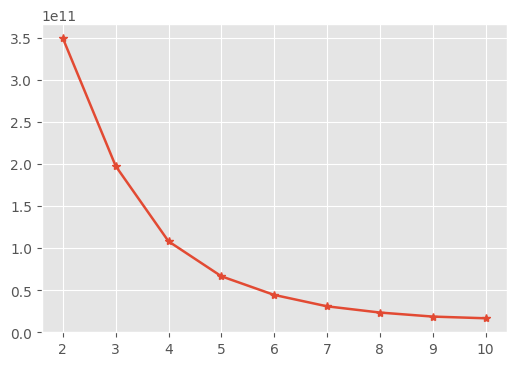

In [323]:
plt.figure(figsize=(6,4))
plt.plot(range(2,11), inertia, marker = "*", linewidth = 1.8)

In [324]:
k_model = KMeans(n_clusters = 4, init = "k-means++", max_iter = 1000)

In [325]:
k_model_fit = k_model.fit(new_df)

In [326]:
new_df

,predicted_purchases,expected_avg_sales_,predicted_clv,profit_margin
1,0.499741,809.543574,8446.886294,422.344315
2,0.277710,561.160804,3153.812357,157.690618
3,0.180374,1382.358199,5372.047778,268.602389
6,0.568668,242.408202,2827.890024,141.394501
7,0.101370,440.041239,844.422261,42.221113
...,...,...,...,...
5935,0.080077,400.022878,630.826356,31.541318
5936,0.441465,64.211847,564.739568,28.236978
5937,0.779793,153.230929,2570.827752,128.541388
5940,0.062766,603.141334,555.630595,27.781530


In [327]:
centers = k_model_fit.cluster_centers_

In [328]:
centers

array([[3.59694329e-01, 5.60318094e+02, 2.98037478e+03, 1.49018739e+02],
       [3.12948129e+00, 7.02410745e+03, 4.60368614e+05, 2.30184307e+04],
       [3.06298105e+00, 4.60844095e+03, 1.69706586e+05, 8.48532931e+03],
       [1.63371935e+00, 2.49111257e+03, 3.38576964e+04, 1.69288482e+03]])

In [329]:
labels = k_model_fit.labels_

In [330]:
labels = pd.Series(labels, name = "Labels")

In [331]:
ggf_filter = pd.concat([ggf_filter, labels], axis = 1)

In [332]:
label_mapper = dict({0 : "Low", 3: "Medium", 1: "High", 2: "V_High"})

In [333]:
ggf_filter["Labels"] = ggf_filter["Labels"].map(label_mapper)

In [334]:
ggf_filter.groupby("Labels").mean().T

Labels,High,Low,Medium,V_High
Customer ID,NaN,14452.219495,14004.174603,14634.555556
frequency,NaN,7.818527,5.666667,7.555556
recency,NaN,386.802281,387.841270,386.888889
T,NaN,523.022814,526.507937,582.222222
monetary_value,NaN,338.379056,324.980190,213.589381
p_not_alive,NaN,0.156969,0.137224,0.259945
p_alive,NaN,0.843031,0.862776,0.740055
predicted_purchases,NaN,0.405126,0.311828,0.336558
actual30,NaN,0.760620,0.487807,0.919049
error,NaN,0.355494,0.175978,0.582491


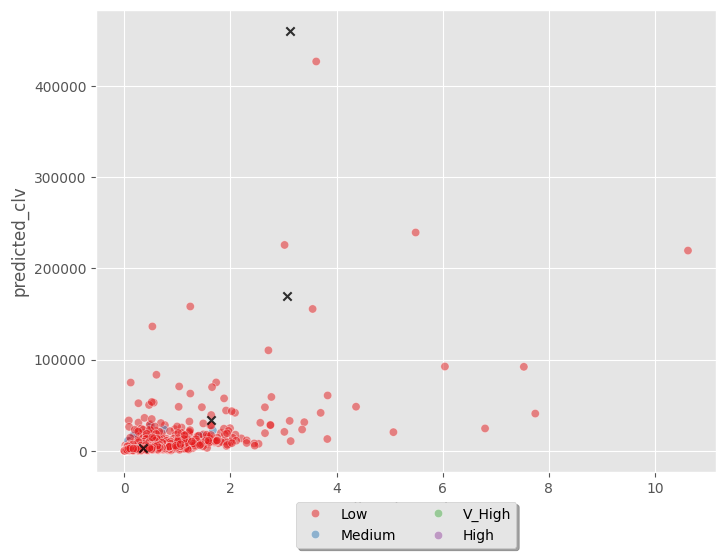

In [335]:
plt.figure(figsize=(8,6))
sns.scatterplot(x = "predicted_purchases", y = "predicted_clv", hue = "Labels", palette = "Set1", data = ggf_filter, alpha=0.5)
plt.scatter(centers[:, 0], centers[:, 2], marker = "x", color = "k", alpha = 0.8)
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05), shadow=True, ncol=2)

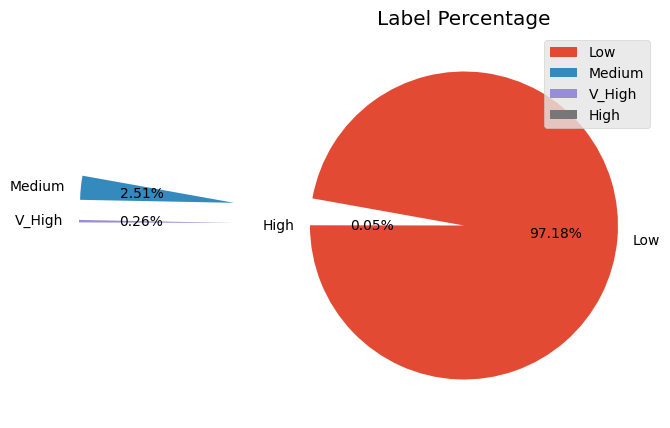

In [336]:
plt.figure(figsize=(5,5))
# Get the value counts, which determine the wedges and their order
label_counts = ggf_filter["Labels"].value_counts()
# Get the labels in the correct order corresponding to the value counts
pie_labels = label_counts.index
# Define explode to match the number of wedges
explode_list = [0.0, 1.5, 1.5, 0.0] # Assuming 4 wedges, adjust if needed

plt.pie(label_counts, labels=pie_labels, startangle=180, explode=explode_list, autopct="%1.2f%%")
plt.title("Label Percentage")
plt.legend()
plt.show()

In [337]:
ggf_filter.to_csv("customer_segmentation_result.csv")